<a href="https://colab.research.google.com/github/popuriity/bootcamp_projects/blob/main/Netflix_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Dataset Analysis

**Date**: 26 Febuary 2023

**Author**: Thunpischa Yodkaew (Pop)

**Data Source**: https://www.kaggle.com/datasets/shivamb/netflix-shows

**Task1-5 Source**: [Solving Real-World Data Analysis Tasks with Python Pandas & Dataiku DSS (Movie Analysis)](https://youtu.be/GJA_PAnqGY8)



## Import Tools and Data

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
netflix = pd.read_csv("/content/netflix_titles.csv")

## Glimpse

In [ ]:
# glimpse
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


There are missing values in `director`, `cast`, `country`, `date_added`, `rating`, `duration` columns.

### Change `date_added` to be datetime.

Since `date_added` column is object type, I need to change it into datetime to extract year from date.

In [ ]:
# select a data point to consider time format.
netflix['date_added'][0]

'September 25, 2021'

Since there are whitespace in `date_added` column, let's trim whitespace first.

In [ ]:
# trim white space
netflix['date_added'] = netflix['date_added'].str.strip()

In [ ]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], format='%B %d, %Y')
print(netflix['date_added'].dtype)

datetime64[ns]


## Task 1 : What is the most popular release year for movies on Netflix?

In [ ]:
# how many type of shows
netflix['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

There are 2 types of the show which are "movie" and "TV show".

Next, I will filter out "TV show" types since I would like to focus on "movie" type only.

In [ ]:
# select only movie type
movies = netflix[netflix['type'] == 'Movie']
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_abbr_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Sep
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,Sep
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,Sep
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,Sep
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,Sep


In [ ]:
movies_year = movies['release_year'].value_counts().reset_index()
movies_year.columns = ['year', 'count']
movies_year = movies_year.sort_values(by = 'count', ascending = False)
movies_year.head(10)

,year,count
0,2017,767
1,2018,767
2,2016,658
3,2019,633
4,2020,517
5,2015,398
6,2021,277
7,2014,264
8,2013,225
9,2012,173


From the table, **2017 and 2018** the most popular release year for movies on Netflix. There are **767** titles release on each of these year.

## Task 2 : What year did netflix add the most content to its platform?

In [ ]:
# create year_added column from getting year of date_added
# since there are NA in columns, I use convert_dtypes to keep it datetime type and avoid decimal

netflix['year_added'] = netflix['date_added'].dt.year.convert_dtypes()

In [ ]:
netflix['year_added'].value_counts()

2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: Int64

<AxesSubplot:xlabel='year_added', ylabel='Count'>

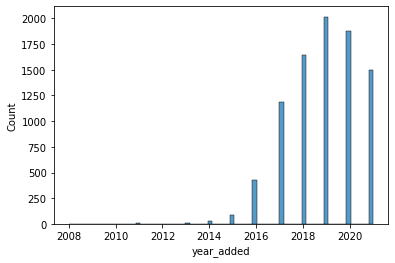

In [ ]:
sns.histplot(data = netflix, x = 'year_added')

2019 is the year that netflix added the most content.

## Task 3 : Independent of year, what is the most popular month to add new content?

In [ ]:
# create month_added columns contains short month name
netflix['month_added'] = netflix['date_added'].dt.month.convert_dtypes()
netflix['month_abbr_added'] = netflix['date_added'].dt.strftime('%b')

In [ ]:
netflix.value_counts('month_abbr_added')

month_abbr_added
Jul    827
Dec    813
Sep    770
Apr    764
Oct    760
Aug    755
Mar    742
Jan    738
Jun    728
Nov    705
May    632
Feb    563
dtype: int64

July is the most popular month to add new content when we combine all year.

What about month of each year?

In [ ]:
# create new df to count titles in each month of year
added_ym = netflix.groupby(['year_added', 'month_added'])['title'].count().reset_index()
added_ym.columns = ['year', 'month', 'count']
added_ym.sort_values(by = ['year', 'month'])

,year,month,count
0,2008,1,1
1,2008,2,1
2,2009,5,1
3,2009,11,1
4,2010,11,1
...,...,...,...
103,2021,5,132
104,2021,6,207
105,2021,7,257
106,2021,8,178


I would like to show heatmap, so I reshape df to be pivot table. Since there are missing values in some month, I replace it as 0.

In [ ]:
# create pivot table with replacing NA by 0
h = added_ym.pivot("year", "month", "count").fillna(0).astype('int')
h

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2008,1,1,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,1,0,0,0,0,0,1,0
2010,0,0,0,0,0,0,0,0,0,0,1,0
2011,0,0,0,0,1,0,0,0,1,11,0,0
2012,0,1,0,0,0,0,0,0,0,0,1,1
2013,0,0,1,0,0,0,0,1,2,3,2,2
2014,2,2,0,2,0,1,1,1,1,4,4,6
2015,1,4,5,5,6,6,7,2,7,14,4,21
2016,43,15,17,22,13,18,28,34,48,51,44,96


<AxesSubplot:xlabel='month', ylabel='year'>

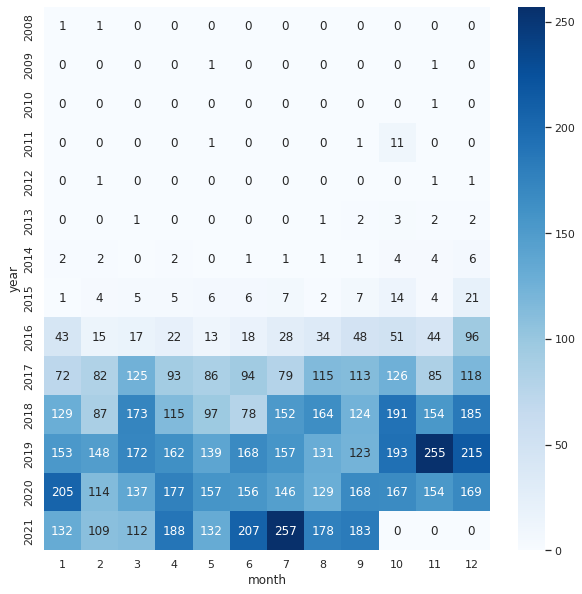

In [ ]:
# heatmap

## setting plot size
sns.set(rc = {"figure.figsize" : (10,10)})
sns.heatmap(h, cmap = "Blues", annot = True, fmt = "")

> Althought the table above shows that July is the most popular month to add content, there is not a certain month of the year that is tend to be a popular month. The result I got before is a result of July2021 which has the most new content of 2021 (dataset is lasted update on September2021).



## Task 4 : What is the movie with the longest title in the dataset?

In [ ]:
movies['title'][0:3]

0                Dick Johnson Is Dead
6    My Little Pony: A New Generation
7                             Sankofa
Name: title, dtype: object

In [ ]:
# add title length column
movies['title_length'] = movies['title'].apply(lambda x: len(x))

In [ ]:
movies.loc[ movies['title_length'] == movies['title_length'].max() , ['title', 'title_length']]

,title,title_length
5164,Jim & Andy: The Great Beyond - Featuring a Ver...,104


The longest title is `Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton` containing 104 characters and whitespace included.

## Task 5 : Which actor/actress shows up most frequently in netflix database?

In [ ]:
# filter out NA in cast column
casts = netflix[netflix['cast'].notnull()]
casts

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_abbr_added
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Sep
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Sep
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,Sep
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,Sep
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,Sep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,3,Mar
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,Nov
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,Nov
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,Jan


In [ ]:
# split cast column
casts['cast_split'] = casts['cast'].str.split(", ")
casts[['cast', 'cast_split']].head()

<ipython-input-28-184104838213>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casts['cast_split'] = casts['cast'].str.split(", ")


,cast,cast_split
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba..."
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab..."
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ..."
5,"Kate Siegel, Zach Gilford, Hamish Linklater, H...","[Kate Siegel, Zach Gilford, Hamish Linklater, ..."
6,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...","[Vanessa Hudgens, Kimiko Glenn, James Marsden,..."


In [ ]:
# expand df each row for each cast
cast_split_row = casts.explode('cast_split').reset_index(drop = True)

# example of show_id "s2"
cast_split_row[ cast_split_row['show_id']== "s2" ]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_abbr_added,cast_split
0,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Sep,Ama Qamata
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Sep,Khosi Ngema
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Sep,Gail Mabalane
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Sep,Thabang Molaba
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Sep,Dillon Windvogel
5,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Sep,Natasha Thahane
6,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Sep,Arno Greeff
7,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Sep,Xolile Tshabalala
8,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Sep,Getmore Sithole
9,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Sep,Cindy Mahlangu


In [ ]:
# top 10 frequently appeared on movies/tv shows
cast_split_row['cast_split'].value_counts()[0:11]

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Amitabh Bachchan    28
Name: cast_split, dtype: int64

In [ ]:
casts[casts['cast'].str.contains("Anupam")]['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

[**Anupam Kher**](https://www.imdb.com/name/nm0451600/) appeared the most. He has appeared on 43 shows both movie and TV show.

## Task 6 : Find 5 longest and shortest movies on netflix.

In [ ]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_abbr_added,duration_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Sep,90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,Sep,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,Sep,125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,Sep,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,Sep,127


In [ ]:
# remove "min" and change type to 'int'
movies['duration_new'] = movies['duration'].str.replace(' min', '')

<ipython-input-47-f4ab94281943>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_new'] = movies['duration'].str.replace(' min', '')


In [ ]:
# find titles that it's duration is missing.
movies[ movies['duration_new'].isnull() ]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_abbr_added,duration_new
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,4,Apr,NaN
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,9,Sep,NaN
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016,8,Aug,NaN


There are 3 movies that duration is missing, so I search for these data from [IMDB website](https://www.imdb.com/) and fill in `movies` dataframe.
- [Louis C.K. 2017](https://www.imdb.com/title/tt6736782/)'s runtime is `1 hour 14 minutes`
- [Louis C.K.: Hilarious 's runtime](https://www.imdb.com/title/tt1421373/?ref_=fn_al_tt_1) is `1 hour 22 minutes`
- [Louis C.K.: Live at the Comedy Store](https://www.imdb.com/title/tt4368814/?ref_=nm_flmg_t_12_wr) 's runtime is `1 hour 6 minutes`

In [ ]:
# fill in duration

movies.loc[5541, 'duration_new'] = 74
movies.loc[5794, 'duration_new'] = 82
movies.loc[5813, 'duration_new'] = 66

In [ ]:
# change type to integer
movies['duration_new'] = movies['duration_new'].astype('int')

<ipython-input-60-87c841d89364>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_new'] = movies['duration_new'].astype('int')


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           6131 non-null   object        
 1   type              6131 non-null   object        
 2   title             6131 non-null   object        
 3   director          5943 non-null   object        
 4   cast              5656 non-null   object        
 5   country           5691 non-null   object        
 6   date_added        6131 non-null   datetime64[ns]
 7   release_year      6131 non-null   int64         
 8   rating            6129 non-null   object        
 9   duration          6128 non-null   object        
 10  listed_in         6131 non-null   object        
 11  description       6131 non-null   object        
 12  year_added        6131 non-null   Int64         
 13  month_added       6131 non-null   Int64         
 14  month_abbr_added  6131 n

Now, `duration_new` is numeric. 😀

### 5 longest movies

In [ ]:
# find 5 longest movies in netflix.
movies[['title', 'duration_new']].sort_values('duration_new', ascending = False).head(5)

,title,duration_new
4253,Black Mirror: Bandersnatch,312
717,Headspace: Unwind Your Mind,273
2491,The School of Mischief,253
2487,No Longer kids,237
2484,Lock Your Girls In,233


### 5 shortest movies

In [ ]:
# find 5 shortest movies in netflix.
movies[['title', 'duration_new']].sort_values('duration_new', ascending = True).head(5)

,title,duration_new
3777,Silent,3
2713,Sol Levante,5
1484,Cops and Robbers,8
1557,Canvas,9
3535,American Factory: A Conversation with the Obamas,10


<AxesSubplot:xlabel='duration_new', ylabel='Count'>

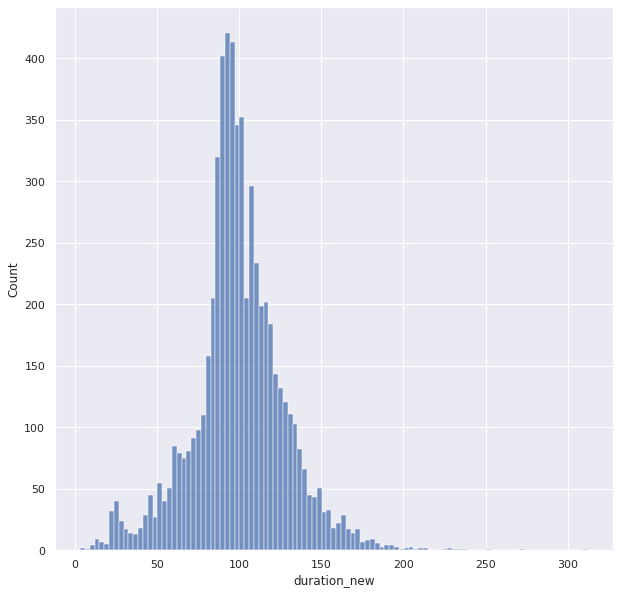

In [ ]:
# distribution of movie duration
sns.histplot(movies, x = 'duration_new')

From histogram, most movies on netflix has duration about 80-100 mins.

## Task 7 : Find the number of each genre of tv shows on netflix.

In [ ]:
# select only TV Show type and store as tvshows dataframe.
tvshows = netflix[netflix['type'] == 'TV Show']
tvshows.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_abbr_added
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018,5,May
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017,1,Jan
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018,9,Sep
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016,12,Dec
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,Jul


In [ ]:
listed_in = tvshows['listed_in'].str.split(",").tolist()
listed_in[0:5]

[['International TV Shows', ' TV Dramas', ' TV Mysteries'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Docuseries', ' Reality TV'],
 ['International TV Shows', ' Romantic TV Shows', ' TV Comedies'],
 ['TV Dramas', ' TV Horror', ' TV Mysteries']]

In [ ]:
genre_count = {}

for item in listed_in:
    for genre in item:
        # trim whitespace
        genre = genre.strip()
        # if the genre is already in dictionary add 1 up
        if (genre in genre_count):
            genre_count[genre] += 1
        # if the genre isn't in dictionary create new one and assign count 1
        else:
            genre_count[genre] = 1

In [ ]:
# create genre df from dict

genre_df = pd.DataFrame({
    'genre': genre_count.keys(),
    'count': genre_count.values()
})

genre_df.sort_values(by = 'count', ascending = False)

,genre,count
0,International TV Shows,1351
1,TV Dramas,763
8,TV Comedies,581
3,Crime TV Shows,470
13,Kids' TV,451
5,Docuseries,395
7,Romantic TV Shows,370
6,Reality TV,255
10,British TV Shows,253
15,Anime Series,176


For TV shows type, **International TV Shows** is the most genre in netflix, since it contains all shows which are outside US.